In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/raw/spiral.csv", header=None, names=["id","label","x","y"])

In [3]:
data.head()

,id,label,x,y
0,1,3,1.000000,0.175652
1,2,3,0.972366,0.153043
2,3,3,0.948187,0.130435
3,4,3,0.922280,0.107826
4,5,3,0.894646,0.092174


In [4]:
points = data[["x","y"]].to_numpy()

In [5]:
import matplotlib.pyplot as plt

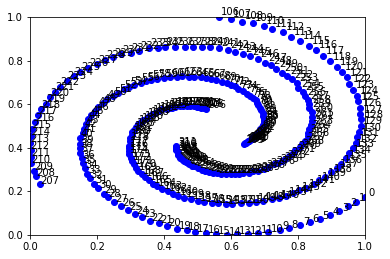

In [6]:
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=10)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [7]:
cluster_n = data[["id","label"]].groupby("label").count().to_dict()

In [8]:
cluster_n["id"]

{1: 101, 2: 105, 3: 106}

In [9]:
data["label"].unique()

array([3, 1, 2])

In [15]:
po_grouped_df = data.groupby(["label"], as_index=False)

In [16]:
for l, df in po_grouped_df:
    print(df)

      id  label         x         y
106  107      1  0.564767  1.000000
107  108      1  0.599309  0.993043
108  109      1  0.633851  0.980870
109  110      1  0.664940  0.973913
110  111      1  0.697755  0.958261
..   ...    ...       ...       ...
202  203      1  0.497409  0.587826
203  204      1  0.506045  0.586087
204  205      1  0.511226  0.584348
205  206      1  0.518135  0.580870
206  207      1  0.525043  0.579130

[101 rows x 4 columns]
      id  label         x         y
207  208      2  0.031088  0.233043
208  209      2  0.018998  0.269565
209  210      2  0.012090  0.295652
210  211      2  0.003454  0.328696
211  212      2  0.003454  0.360000
..   ...    ...       ...       ...
307  308      2  0.440415  0.380870
308  309      2  0.436960  0.387826
309  310      2  0.436960  0.394783
310  311      2  0.436960  0.403478
311  312      2  0.436960  0.406957

[105 rows x 4 columns]
      id  label         x         y
0      1      3  1.000000  0.175652
1      2      3 

In [54]:
order_mat = []
max_iter = max([len(ct) for l, ct in po_grouped_df])
mat_num = [ct[["label","x","y"]].to_records() for l, ct in po_grouped_df]
# for i in range(max_iter):
#     order_mat.append([ ct.iloc[i] for l, ct in po_grouped_df])


In [55]:
mat_num

[rec.array([(106, 1, 0.56476684, 1.        ),
            (107, 1, 0.59930915, 0.99304348),
            (108, 1, 0.63385147, 0.98086957),
            (109, 1, 0.66493955, 0.97391304),
            (110, 1, 0.69775475, 0.95826087),
            (111, 1, 0.72366149, 0.94434783),
            (112, 1, 0.75647668, 0.93043478),
            (113, 1, 0.7806563 , 0.90956522),
            (114, 1, 0.80656304, 0.89043478),
            (115, 1, 0.83419689, 0.86956522),
            (116, 1, 0.85492228, 0.85043478),
            (117, 1, 0.87392055, 0.82434783),
            (118, 1, 0.89637306, 0.79826087),
            (119, 1, 0.91537133, 0.77391304),
            (120, 1, 0.93091537, 0.74956522),
            (121, 1, 0.94645941, 0.72347826),
            (122, 1, 0.95336788, 0.69565217),
            (123, 1, 0.96373057, 0.66782609),
            (124, 1, 0.97582038, 0.64      ),
            (125, 1, 0.97927461, 0.61391304),
            (126, 1, 0.98445596, 0.58434783),
            (127, 1, 0.98618307, 0

In [56]:
reorder_mat = []
for i in range(max_iter):
    for item in mat_num:
        if i < len(item):
            reorder_mat.append(item[i])
reorder_mat = np.array(reorder_mat)

In [57]:
reorder_mat

array([(106, 1, 0.56476684, 1.        ), (207, 2, 0.03108808, 0.23304348),
       (  0, 3, 1.        , 0.17565217), (107, 1, 0.59930915, 0.99304348),
       (208, 2, 0.01899827, 0.26956522), (  1, 3, 0.97236615, 0.15304348),
       (108, 1, 0.63385147, 0.98086957), (209, 2, 0.01208981, 0.29565217),
       (  2, 3, 0.94818653, 0.13043478), (109, 1, 0.66493955, 0.97391304),
       (210, 2, 0.00345423, 0.32869565), (  3, 3, 0.92227979, 0.10782609),
       (110, 1, 0.69775475, 0.95826087), (211, 2, 0.00345423, 0.36      ),
       (  4, 3, 0.89464594, 0.09217391), (111, 1, 0.72366149, 0.94434783),
       (212, 2, 0.00172712, 0.39130435), (  5, 3, 0.86528497, 0.07304348),
       (112, 1, 0.75647668, 0.93043478), (213, 2, 0.        , 0.42434783),
       (  6, 3, 0.83592401, 0.0573913 ), (113, 1, 0.7806563 , 0.90956522),
       (214, 2, 0.00345423, 0.45565217), (  7, 3, 0.80656304, 0.04347826),
       (114, 1, 0.80656304, 0.89043478), (215, 2, 0.00690846, 0.48521739),
       (  8, 3, 0.7737478

In [59]:
pd.DataFrame.from_records(reorder_mat).to_csv("spiral_sorted.csv",index=False)

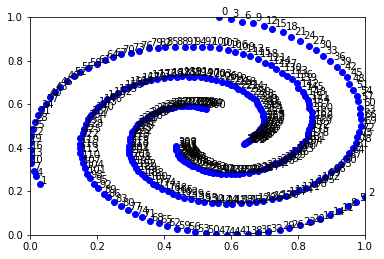

In [45]:
points = reorder_mat
for i in range(len(points)):
    x = points[i][0]
    y = points[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , i, fontsize=10)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()